# Sessió 5.2: Preprocessament de dades

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

## *Missing values*

In [ ]:
df = pd.DataFrame({'A': [np.nan, 2, 3, np.nan, 1],
                   'B': [3, 5, np.nan, 6, 5.5],
                   'C': [0, np.nan, 3, np.nan, 1],
                   'D': [2, 6, 3, np.nan, 2],
                  })
df

In [ ]:
df.isna().sum() # isnull or isna

In [ ]:
df.dropna()

In [ ]:
SimpleImputer(missing_values=np.nan, strategy="mean").fit_transform(df)

In [ ]:
pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy="mean").fit_transform(df))

In [ ]:
pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy="mean").fit_transform(df), columns=df.columns)

In [ ]:
pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy="median").fit_transform(df), columns=df.columns)

In [ ]:
pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy="most_frequent").fit_transform(df), columns=df.columns)

In [ ]:
pd.DataFrame(SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0).fit_transform(df), columns=df.columns)

In [ ]:
pd.DataFrame(KNNImputer(missing_values=np.nan, n_neighbors=2).fit_transform(df), columns=df.columns)

## Codificació de variables categòriques

### Variables ordinals

#### Exemple del conjunt de dades dels diamants

- `carat` weight of the diamond (0.2--5.01)
- `cut` quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color` diamond colour, from J (worst) to D (best)
- `clarity` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- `depth` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- `table` width of top of diamond relative to widest point (43--95)
- `price` price in US dollars (\$326--\$18,823)
- `x` length in mm (0--10.74)
- `y` width in mm (0--58.9)
- `z` depth in mm (0--31.8)


In [ ]:
diam_df = sns.load_dataset("diamonds")
diam_df

In [ ]:
noms = np.sort(diam_df["color"].unique())
valors = np.arange(len(diam_df["clarity"].unique()))
dict(zip(noms, valors))

In [ ]:
diam_df["cut"] = diam_df["cut"].map({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})
diam_df["color"] = diam_df["color"].map({'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6})
diam_df["clarity"] = diam_df["clarity"].map({"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7})
diam_df

### Variables no ordinals

#### Exemple del conjunt de dades de malalties cardíaques

https://archive.ics.uci.edu/ml/datasets/heart+disease

- age: age in years
- sex: sex (1 = male; 0 = female)
- cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- num: diagnosis of heart disease (angiographic disease status) (Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
heart_df = pd.read_csv('/content/drive/MyDrive/JEDI ML Estiu 2023/Dades/heart.csv')
heart_df

In [ ]:
heart_df.isnull().sum()

In [ ]:
heart_df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
heart_df

In [ ]:
import warnings # Provar què passa si el treiem
warnings.filterwarnings('ignore')

heart_df['sex'][heart_df['sex'] == 0] = 'female'
heart_df['sex'][heart_df['sex'] == 1] = 'male'

heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 1] = 'typical angina'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 2] = 'atypical angina'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 3] = 'non-anginal pain'
heart_df['chest_pain_type'][heart_df['chest_pain_type'] == 4] = 'asymptomatic'

heart_df['fasting_blood_sugar'][heart_df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
heart_df['fasting_blood_sugar'][heart_df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

heart_df['rest_ecg'][heart_df['rest_ecg'] == 0] = 'normal'
heart_df['rest_ecg'][heart_df['rest_ecg'] == 1] = 'ST-T wave abnormality'
heart_df['rest_ecg'][heart_df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

heart_df['exercise_induced_angina'][heart_df['exercise_induced_angina'] == 0] = 'no'
heart_df['exercise_induced_angina'][heart_df['exercise_induced_angina'] == 1] = 'yes'

heart_df['st_slope'][heart_df['st_slope'] == 1] = 'upsloping'
heart_df['st_slope'][heart_df['st_slope'] == 2] = 'flat'
heart_df['st_slope'][heart_df['st_slope'] == 3] = 'downsloping'

heart_df['thalassemia'][heart_df['thalassemia'] == 1] = 'normal'
heart_df['thalassemia'][heart_df['thalassemia'] == 2] = 'fixed defect'
heart_df['thalassemia'][heart_df['thalassemia'] == 3] = 'reversable defect'

heart_df

In [ ]:
(heart_df == 0).sum()

In [ ]:
cols_with_na = ["chest_pain_type", "st_slope", "thalassemia"]
heart_df[cols_with_na] = heart_df[cols_with_na].replace({0: np.nan})
heart_df.isnull().sum()

In [ ]:
heart_df.shape

In [ ]:
heart_df = heart_df.dropna()
heart_df.shape

Segurament seria millor considerar imputar, ja que perdem més de la meitat de les dades!

In [ ]:
heart_df.dtypes

In [ ]:
heart_df = pd.get_dummies(heart_df, drop_first=True)
heart_df

### *Outliers*

In [ ]:
sns.pairplot(diam_df, kind="reg");

In [ ]:
sns.boxplot(x=diam_df["carat"]);

In [ ]:
diam_df.describe(include="all")

In [ ]:
diam_df[diam_df["carat"] > 4]

In [ ]:
indexos = np.array(diam_df[diam_df["carat"] > 4].index)

In [ ]:
diam_df = diam_df[diam_df["carat"] <= 4]

## Exercici

* Llegeix el conjunt de dades de pingüins (https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv) sense utilitzar la funció `sns.load_dataset`.
* Tracta els *missing values*.
* Detecta possibles *outliers* del conjunt de dades.
* Estandarditza les dades.
* Crea un nou *data frame* seleccionant únicament els pingüins de la raça Gentoo.
* Modela el pes en funció de la resta de variables (longitud i profunditat del bec, longitud de les aletes, sexe i illa), codificant adequadament les variables categòriques explicatives.
* Quin pes hauria de tenir un pingüí mascle de l'illa Biscoe amb un bec de 40 mm de longitud i 20mm de profunditat, i unes aletes de 180 mm?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
print('NaN Values per column:\n' +
      '---------------------')
print(df.isnull().sum())
print('\nData frame size:\n' +
      '------------------')
print(df.shape)
print('\nData frame description:\n' +
      '-------------------------')
print(df.describe())
print('\nData frame types:\n' +
      '-------------------------')
print(df.dtypes)


NaN Values per column:
---------------------
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Data frame size:
------------------
(344, 7)

Data frame description:
-------------------------
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

Data frame types:
-------------------------
species    

In [5]:
# SimpleImputer(missing_values=np.nan, strategy="mean").fit_transform(df)
# df = pd.get_dummies(df, drop_first = True)
df_not_nan = df.dropna()
df_not_nan

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


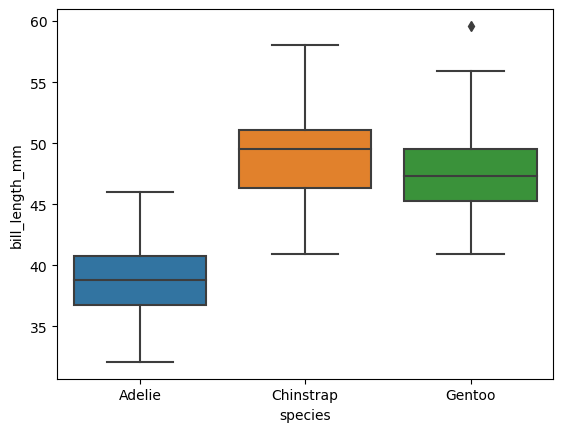

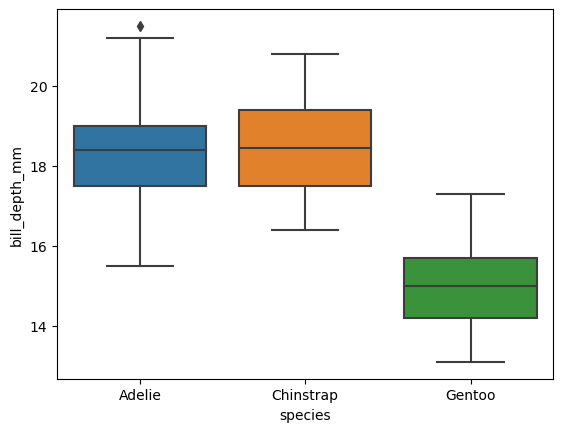

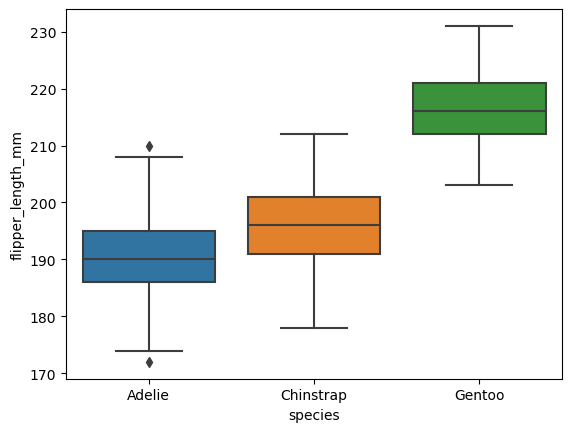

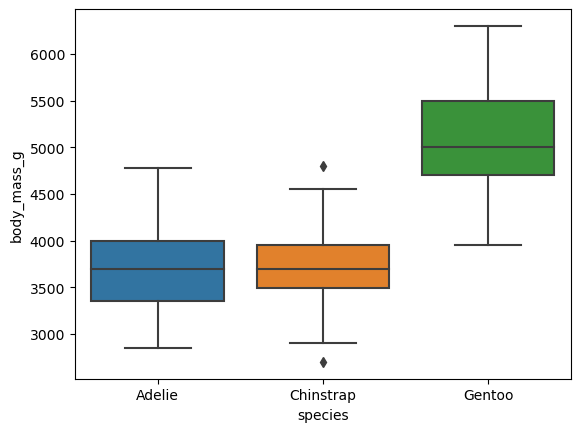

In [20]:
features_list = df.columns.values.tolist()
print(features_list)

num_features = ['bill_length_mm',
                'bill_depth_mm',
                'flipper_length_mm',
                'body_mass_g']

for feature in num_features:
    plt.figure()
    sns.boxplot(x=df["species"], y=df[feature]);

Extensions:
* Provar més models.
* *Hyperparameter tuning* (`GridSearchCV`).
* Haver fet train-test.